## Problema 2

### Funções de suporte e principais definições

    Resultados gráficos

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import diags, linalg

In [31]:
u = lambda x,y: np.cos(x) * np.sin(y)
f = lambda x,y: -2 * np.cos(x) * np.sin(y)

    item (a)

In [32]:
def verify() -> bool:
    X = np.linspace(0, 1, 5)
    Y = np.linspace(0, 1, 5)
    for x in X:
        for y in Y:
            left = f(x,y) # esquerda da eq.
            right = -2 * np.cos(x) * np.sin(y) # direita da eq.
            
            if not np.isclose(left, right):
                print(f"Erro: para (x={x}, y={y}), esquerda = {left}, direita = {right}")
                return False
    
    print("A solução u(x,y) satisfaz a equação com a função de força f(x,y)!") 
    return True

In [37]:
print("Validando o item (a)")
verify()

Validando o item (a)
A solução u(x,y) satisfaz a equação com a função de força f(x,y)!


True

    item (b)

In [33]:
def poisson_system(N: int, f: float, g: float):
    h = 1/N
    n = (N-1)**2 
    diagonals = [-1, -1, 4, -1, -1]
    offsets = [-N+1, -1, 0, 1, N-1] #confere o deslocamento das diagonais
    
    # matriz A 
    A: csc_array = diags(diagonals=diagonals, offsets=offsets, shape=(n,n)).tocsc()
    
    # vetor b (termos da equação e cond. de contorno)
    b = np.zeros(n)

    # Preenchimento de b com f (pontos internos)
    for k in range(1, N):
        for j in range(1, N):
            i = (k - 1) * (N-1) + (j-1) # ordem lexicográfica
            x, y = k * h, j * h
            b[i] = h ** 2 * f(x, y)
    
    # Bordas (esq -> dir) & (inf -> sup): condições de contorno
            if k == 1:
                b[i] -= g(0, y)  # borda esquerda
            if k == N - 1:
                b[i] -= g(1, y)  # borda direita
            if j == 1:
                b[i] -= g(x, 0)  # borda inferior
            if j == N - 1:
                b[i] -= g(x, 1)  # borda superior
    
    return A, b

In [34]:
def error_function(N, exact, numeric) -> pd.DataFrame:
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)

    # Solução exata nos pontos da grade
    U_exata = exact(X, Y)

    # Inserir solução numérica nos pontos internos
    U_numerica = np.zeros((N+1, N+1))
    U_numerica[1:N, 1:N] = numeric.reshape((N-1, N-1))

    # Calcular o erro absoluto
    errors = np.abs(U_exata - U_numerica)
    df = pd.DataFrame(errors, 
                      columns=[f"Erro y={i/(N+1):.2f}" for i in range(N+1)],
                      index=[f"x={i/(N+1):.2f}" for i in range(N+1)])
    
    return df

In [35]:
def plot_solutions(N, exact, numeric):
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)

    # Solução exata
    U_exata = exact(X, Y)

    # Inserir solução numérica nos pontos internos
    U_numerica = np.zeros((N+1, N+1))
    U_numerica[1:N, 1:N] = numeric.reshape((N-1, N-1))

    # Plotar solução exata
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.contourf(X, Y, U_exata, cmap='plasma')
    plt.colorbar()
    plt.title('Solução Exata')

    # Plotar solução numérica
    plt.subplot(1, 2, 2)
    plt.contourf(X, Y, U_numerica, cmap='plasma')
    plt.colorbar()
    plt.title('Solução Numérica')

    plt.show()

In [36]:
def solve_system(N, f, u):
    g = lambda x,y: u(x,y)

    A, b = poisson_system(N, f, g) #(i)
    numeric = linalg.spsolve(A,b)  #(ii)
    plot_solutions(N, u, numeric)  #(iii)
    error_function(N, u, numeric)  #(iv)

========== Simulações ==========

***** N = 50 *****



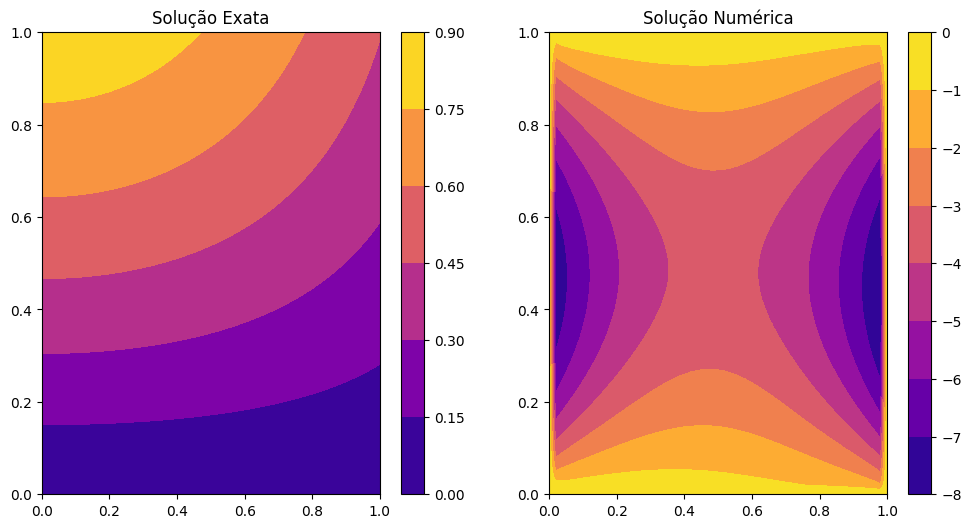

***** N = 100 *****



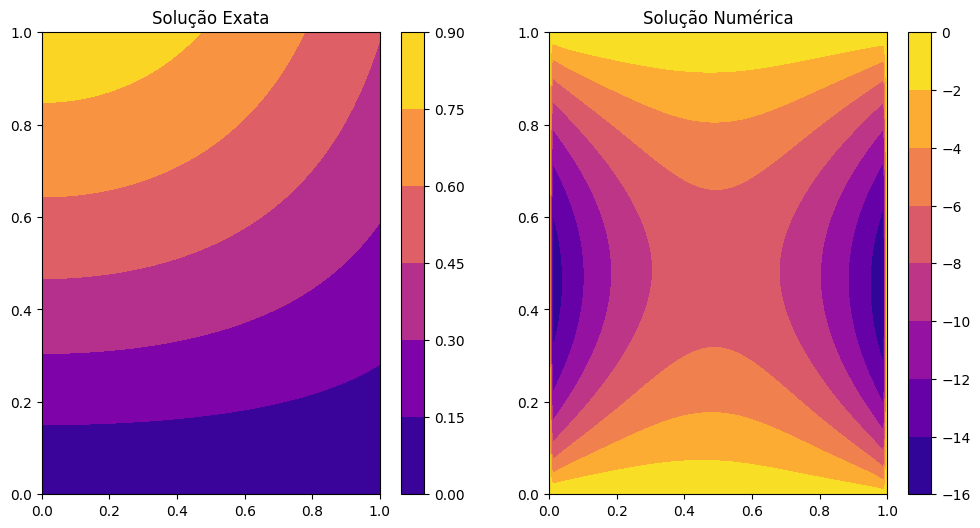

***** N = 200 *****



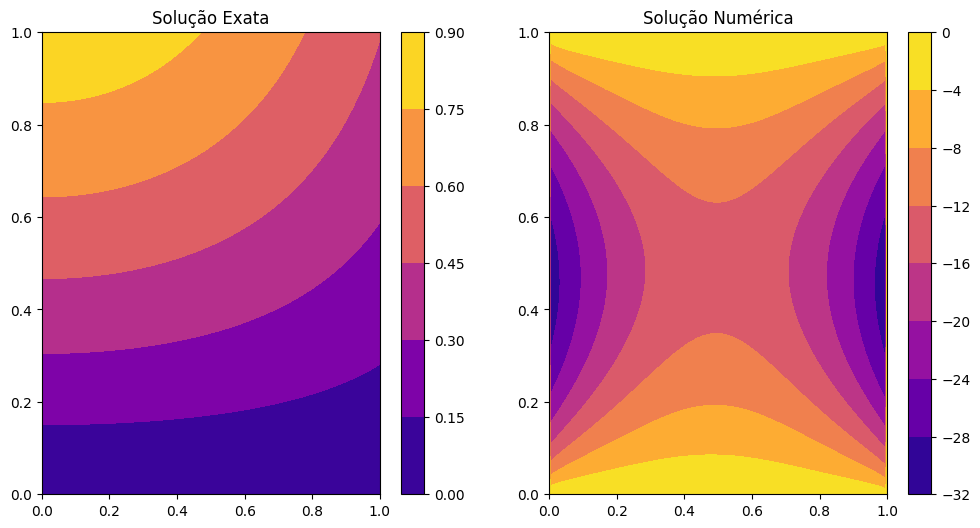

In [38]:
print(f"{'='*10} Simulações {'='*10}\n")
for N in [50, 100, 200]:
    print(f"{'*'*5} N = {N} {'*'*5}\n")
    solve_system(N, f, u)